In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/ML/3/v2/

/content/drive/My Drive/ML/3/v2


In [ ]:
df = pd.read_csv('train.csv')

<ipython-input-14-cd75a77447fc>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,

In [ ]:
df.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


В датафрейме слишком много пропусков в столбцах. Необходимо убрать столбцы в которых слишком много пропусков, в остальных заполнить пустые значения.

In [ ]:
#Удаление столбцов, где > 50% пропусков
threshold = len(df) * 0.5
df=df.dropna(axis=1, thresh=threshold)

In [ ]:
#Удаление дублирующихся строк
df = df.drop_duplicates()
df.shape

(14456, 343)

Как выяснилось, дубликатов в датафрейме не было

In [ ]:
#Проверка к каким типам принадлежат столбцы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 343 entries, report_date to col2663
dtypes: float64(338), int64(3), object(2)
memory usage: 37.8+ MB


In [ ]:
#Определение столбцов принадлежащих типу object
df.select_dtypes(include=['object']).columns

Index(['report_date', 'col1454'], dtype='object')

In [ ]:
df['col1454']

,col1454
0,00f3d719-a6ec-4960-ba01-8372eb705443
1,01febac0-b083-494e-8589-f98400074b94
2,0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3,0364571d-5325-ed11-b823-005056b825cd
4,065957a6-9b2a-435a-b561-024e9e8d9ad7
...,...
14451,fc4b5aa0-c4d6-4394-93db-57a1505e66c4
14452,fcc827d8-b64b-4b59-b718-87f2a51d77a4
14453,fd5f22f5-36f6-4dca-9896-8c9e90bbb702
14454,fdf04fb7-5404-4a9c-ae5b-e1e893060631


In [ ]:
#Удаление столбца т.к. нет возможности определить, что там зашифровано
df=df.drop('col1454', axis=1)

In [ ]:
#Заполнение пропусков нулями
df = df.fillna(0)
df.head()

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164


In [ ]:
df.set_index('report_date', inplace = True)

In [ ]:
#Количество уникальных клиентов
df['client_id'].nunique()

4817

In [ ]:
#Массив уникальных id клиентов
unique_clients = df['client_id'].unique()

In [ ]:
#Разделение датафрейма на train и test
np.random.seed(12832)
indices=np.random.choice(len(unique_clients), int(len(unique_clients)*0.8), replace=False)
train_unique_clients = unique_clients[indices]
test_unique_clients=np.delete(unique_clients, indices)

train=df[df['client_id'].isin(train_unique_clients)]
test=df[df['client_id'].isin(test_unique_clients)]

In [ ]:
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test.drop('target', axis=1)
y_test = test['target']

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Расчет дисбаланса классов
classes = np.unique(y_train)

# Вычисление весов для балансировки классов
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Создание словаря с весами классов
class_weights = dict(zip(classes, weights))

In [ ]:
model = CatBoostClassifier(eval_metric = "AUC", class_weights=class_weights)
model.fit(x_train, y_train, eval_set=(x_test, y_test)) # обучение классификатора
prediction = model.predict(x_test) # передача тестовой выборки в модель
model

Learning rate set to 0.058002
0:	test: 0.6960678	best: 0.6960678 (0)	total: 223ms	remaining: 3m 42s
1:	test: 0.7052945	best: 0.7052945 (1)	total: 327ms	remaining: 2m 43s
2:	test: 0.7153648	best: 0.7153648 (2)	total: 440ms	remaining: 2m 26s
3:	test: 0.7280511	best: 0.7280511 (3)	total: 536ms	remaining: 2m 13s
4:	test: 0.7347113	best: 0.7347113 (4)	total: 611ms	remaining: 2m 1s
5:	test: 0.7344963	best: 0.7347113 (4)	total: 714ms	remaining: 1m 58s
6:	test: 0.7291841	best: 0.7347113 (4)	total: 788ms	remaining: 1m 51s
7:	test: 0.7290876	best: 0.7347113 (4)	total: 897ms	remaining: 1m 51s
8:	test: 0.7328037	best: 0.7347113 (4)	total: 1s	remaining: 1m 50s
9:	test: 0.7322827	best: 0.7347113 (4)	total: 1.09s	remaining: 1m 48s
10:	test: 0.7199464	best: 0.7347113 (4)	total: 1.16s	remaining: 1m 44s
11:	test: 0.7299036	best: 0.7347113 (4)	total: 1.27s	remaining: 1m 44s
12:	test: 0.7344632	best: 0.7347113 (4)	total: 1.35s	remaining: 1m 42s
13:	test: 0.7296362	best: 0.7347113 (4)	total: 1.48s	remainin

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2834
           1       0.05      0.38      0.08        64

    accuracy                           0.82      2898
   macro avg       0.52      0.60      0.49      2898
weighted avg       0.96      0.82      0.88      2898



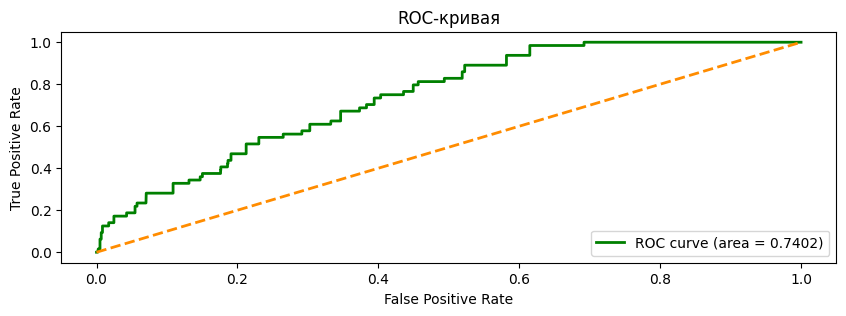

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prediction = model.predict_proba(x_test)[:,1]

lr_auc = roc_auc_score(y_test, y_prediction)

fpr, tpr, _ = roc_curve(y_test, y_prediction)
roc_auc = roc_auc_score(y_test, y_prediction)

plt.figure(figsize=(10, 3))
plt.plot(fpr, tpr, color='green',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

# Сохранить модель в файл
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)